# How to get Pokemon Data
   Have you ever wanted to analyze pokemon data? If you answered yes to this question this is the tutorial for you! Pokemon is a universal game and television series beloved by millions. Over the years with the rise of technology, Pokemon has transformed into a interactive experience with the Pokemon itself. One example of this is the game Pokemon Go! This game had over 147 million monthly active users by the end of 2018 and by  early 2019, the game had over a billion global downloads, grossing over $3 billion in revenue. Clearly, to many people (including my husband) pokemon is more than a game, its an obsession. Thats where a pokemon API comes handy. You literally have all the information at your fingertips to dominate in the game, or if you're really savvy you could even build your own Pokemon game from this API.
   

## Step 1: Importing Pokebase

 First, you will want to import a package called **pokebase**. This Package communicates with a Pokemon API. Obviously, there is more info on this API than I could possibly share, so if you want to learn all the ins and outs of the API go to this website **https://pokeapi.co/docs/v2.html#pokemon**.
 
    

In [1]:
import pokebase as pb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Scrape some Pokemon off the web

I wanted at least 700 names of pokemon, so that I could have somewhat a complete list of all the pokemons' stats that I desired from the API. I was able to scrape a complete list of pokemon off of someone's github, so shout out to that guy! 

In [2]:
url= "https://github.com/phalt/pokeapi/blob/master/data/v2/csv/pokemon.csv"
poke=pd.read_html(url)
poke=poke[0]
all_names = poke['identifier']
subset = poke.loc[:700, 'identifier']

## Step 3: Use Pokebas

Pokebase is really quite simple to use. A simple example of how to use the package would be getting the weight and height of a certain pokemon, like charmander and minior-green-meteor.

In [3]:
pb.pokemon('charmander').weight

85

In [4]:
pb.pokemon('minior-green-meteor').height


3

Using the information from the API website, you can pretty much get any type of information about any pokemon. Its important to look over that website thoroughly so you know where to find your desired information. The specs I wanted to see for the list of pokemon I have is there height (in decimeters), weight (in hectograms), Base Experience (the base experience gained for defeating this Pokémon) and their generation. From there, I will create graphics and narrow in on certain interesting pokemon. 

In [5]:
pb.pokemon(subset[0]).species.generation.name

'generation-i'

In order to get all the desired specs, I will use a for loop to loop through the list of pokemon names I scraped.

In [6]:
ht = []
wt = []
spec = []
gen = []
for i in subset:
    ht.append(pb.pokemon(i).height)
    wt.append(pb.pokemon(i).weight)
    spec.append(pb.pokemon(i).base_experience)
    gen.append(pb.pokemon(i).species.generation.name)
    

In [7]:
type(ht)

list

In [8]:
d = {"Name":subset,
    "Ht": ht,
    "Wt":wt,
    "BaseExperience":spec,
    "Gen":gen}

In [9]:
pokeData = pd.DataFrame(d)

In [10]:
pokeData.head()

,Name,Ht,Wt,BaseExperience,Gen
0,bulbasaur,7,69,64,generation-i
1,ivysaur,10,130,142,generation-i
2,venusaur,20,1000,236,generation-i
3,charmander,6,85,62,generation-i
4,charmeleon,11,190,142,generation-i


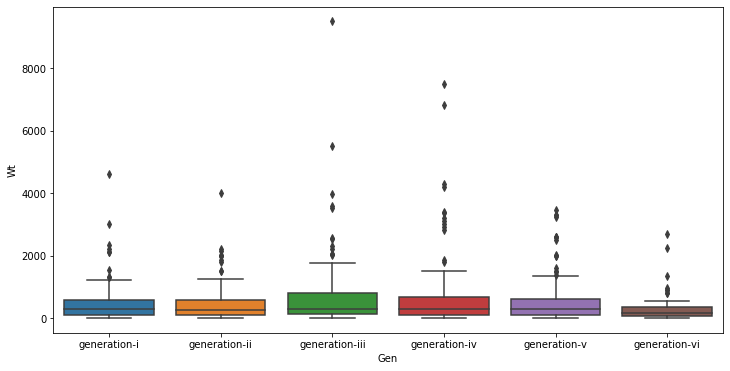

In [11]:
plt.figure(figsize=(12, 6))
pt4fig1=sns.boxplot(x="Gen", y="Wt", data=pokeData)
fig1 = pt4fig1.get_figure()
fig1.savefig("PT4Fig1.png")

In [12]:
pokeData['Wt'].max()

9500

In [13]:
pokeData[(pokeData['Wt'] == 9500)]

,Name,Ht,Wt,BaseExperience,Gen
382,groudon,35,9500,302,generation-iii


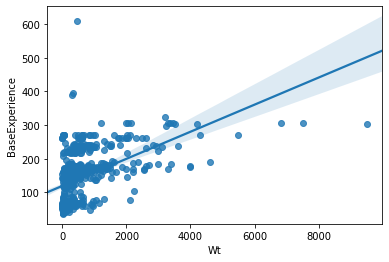

In [14]:
pt4fig2=sns.regplot(x="Wt", y="BaseExperience", data = pokeData)
fig2=pt4fig2.get_figure()
fig2.savefig("\Figs\PT4Fig2.png")

In [15]:
pokeData['BaseExperience'].max()

608

In [16]:
pokeData[(pokeData['BaseExperience'] == 608)]

,Name,Ht,Wt,BaseExperience,Gen
241,blissey,15,468,608,generation-ii


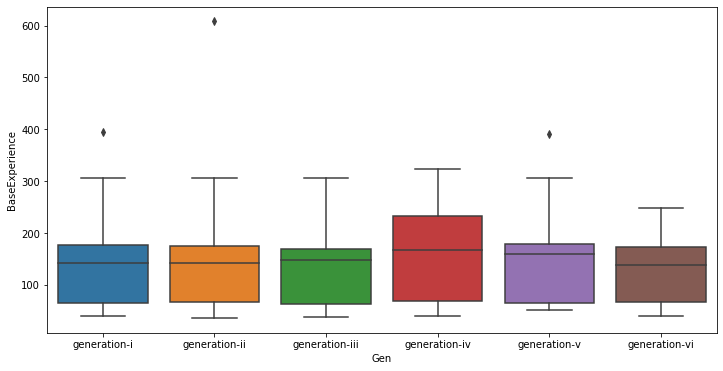

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Gen", y="BaseExperience", data=pokeData)

## Results

The heaviest pokemon out of the list of pokemon I have seems to be a Groudon, which is a generation 3 pokemon wieghing 9500 hectograms. The pokemon with the greatest base expereince is Blissey, which is a generation 2 pokemon.